In [13]:
import pandas as pd           # For handling and analyzing structured data
import numpy as np            # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns         # For advanced data visualization
from sklearn.linear_model import LinearRegression  # For training regression model
from sklearn.model_selection import train_test_split  # To split data for training/testing
from sklearn.metrics import r2_score, mean_squared_error  # For model evaluation


imported required libraries and mentioned use of each in front of it

In [14]:
data = pd.read_csv(r"C:/Users/Aryan Singh/Desktop/Internship/task 2/sales.csv", encoding='ISO-8859-1')
data = data[['Product Name', 'Region', 'Sales', 'Profit', 'Discount', 'Category', 'Ship Date']]

data.head()


,Product Name,Region,Sales,Profit,Discount,Category,Ship Date
0,Bush Somerset Collection Bookcase,South,261.9600,41.9136,0.00,Furniture,11/11/2016
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,731.9400,219.5820,0.00,Furniture,11/11/2016
2,Self-Adhesive Address Labels for Typewriters b...,West,14.6200,6.8714,0.00,Office Supplies,6/16/2016
3,Bretford CR4500 Series Slim Rectangular Table,South,957.5775,-383.0310,0.45,Furniture,10/18/2015
4,Eldon Fold 'N Roll Cart System,South,22.3680,2.5164,0.20,Office Supplies,10/18/2015


In [15]:

data.tail()


,Product Name,Region,Sales,Profit,Discount,Category,Ship Date
9989,Ultra Door Pull Handle,South,25.248,4.1028,0.2,Furniture,1/23/2014
9990,Tenex B1-RE Series Chair Mats for Low Pile Car...,West,91.960,15.6332,0.0,Furniture,3/3/2017
9991,Aastra 57i VoIP phone,West,258.576,19.3932,0.2,Technology,3/3/2017
9992,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",West,29.600,13.3200,0.0,Office Supplies,3/3/2017
9993,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",West,243.160,72.9480,0.0,Office Supplies,5/9/2017


In [16]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  9994 non-null   object 
 1   Region        9994 non-null   object 
 2   Sales         9994 non-null   float64
 3   Profit        9994 non-null   float64
 4   Discount      9994 non-null   float64
 5   Category      9994 non-null   object 
 6   Ship Date     9994 non-null   object 
dtypes: float64(3), object(4)
memory usage: 546.7+ KB


STEP 2:
now checking for duplicate and missing values 

In [17]:
print("missing values are:\n", data.isnull().sum())
print("duplicate values are:\n", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("removed duplicate items:\n", data.duplicated().sum())


missing values are:
 Product Name    0
Region          0
Sales           0
Profit          0
Discount        0
Category        0
Ship Date       0
dtype: int64
duplicate values are:
 1
removed duplicate items:
 0


In [18]:

data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [19]:
data.head()

,Product Name,Region,Sales,Profit,Discount,Category,Ship Date
0,Bush Somerset Collection Bookcase,South,261.9600,41.9136,0.00,Furniture,2016-11-11
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South,731.9400,219.5820,0.00,Furniture,2016-11-11
2,Self-Adhesive Address Labels for Typewriters b...,West,14.6200,6.8714,0.00,Office Supplies,2016-06-16
3,Bretford CR4500 Series Slim Rectangular Table,South,957.5775,-383.0310,0.45,Furniture,2015-10-18
4,Eldon Fold 'N Roll Cart System,South,22.3680,2.5164,0.20,Office Supplies,2015-10-18


step 3:
visualization

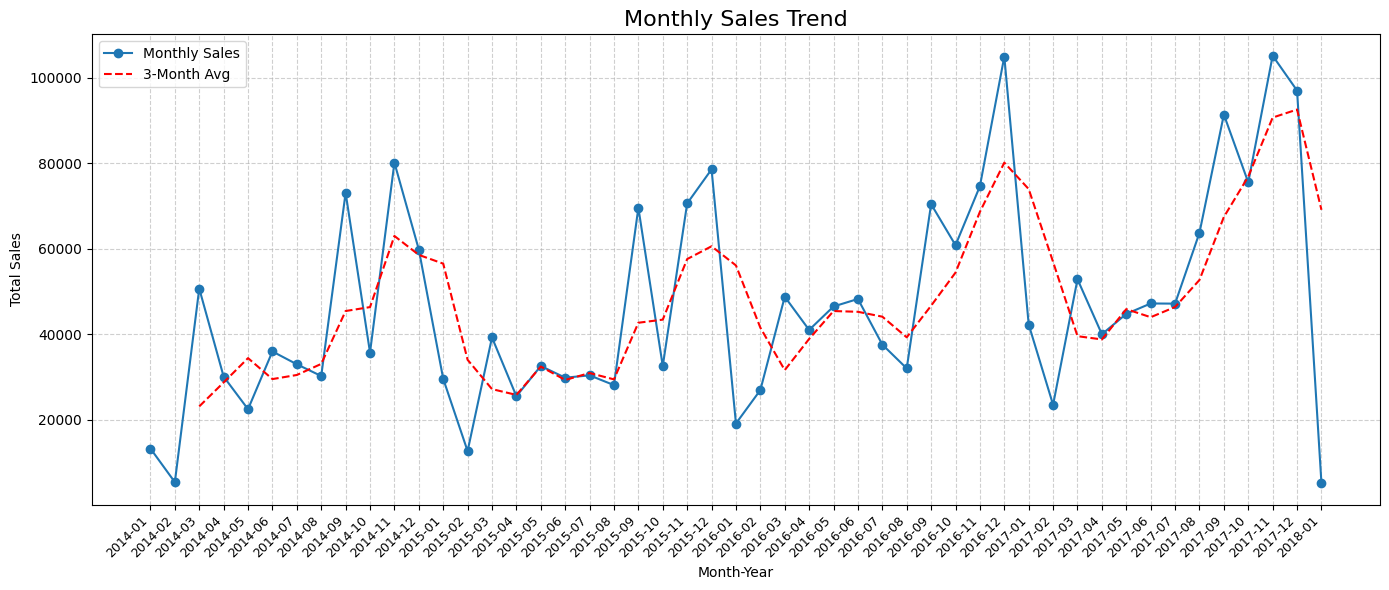

In [ ]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Month_Year'] = data['Ship Date'].dt.to_period('M')
monthly_sales = data.groupby('Month_Year')['Sales'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Month_Year'].astype(str)
monthly_sales['Smoothed'] = monthly_sales['Sales'].rolling(window=3).mean()

plt.figure(figsize=(14,6))
plt.plot(monthly_sales['Month_Year'], monthly_sales['Sales'], marker='o', linewidth=1.5, label='Monthly Sales')
plt.plot(monthly_sales['Month_Year'], monthly_sales['Smoothed'], linestyle='--', color='red', label='3-Month Avg')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:

data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')
data['Discount'] = pd.to_numeric(data['Discount'], errors='coerce')
data.dropna(subset=['Sales', 'Profit', 'Discount'], inplace=True)

X = data[['Profit', 'Discount']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: -0.3677550239945191
Mean Squared Error: 816669.4409355354
